# Github Projects 2017 Analysis and Visualization

This notebook will visualize results from a graph analysis of the graph formed by Github `ForkEvents` (user-forked->repository) and `WatchEvents` (user-starred->repository). It will compare the top Github projects by stars with the metric we create in [

In [41]:
import csv
import plotly

# Read in the data and convert the count to numeric values
star_counts = [dict(line) for line in csv.DictReader(open("top_stars.csv"), fieldnames=["repo","count"])]
[record.update({"count": int(record["count"])}) for record in star_counts]
star_counts[0:5]

import pandas as pd

star_counts = pd.DataFrame(
  star_counts, 
  index=[record["repo"] for record in star_counts]
)
# star_counts = star_counts.drop("repo", axis=1)
star_counts = star_counts.sort_values(by="count", ascending=True)
star_counts[0:5]

x = star_counts["count"]
y = star_counts["repo"]

[<matplotlib.text.Text at 0x11b867198>, <matplotlib.text.Text at 0x119f20dd8>]

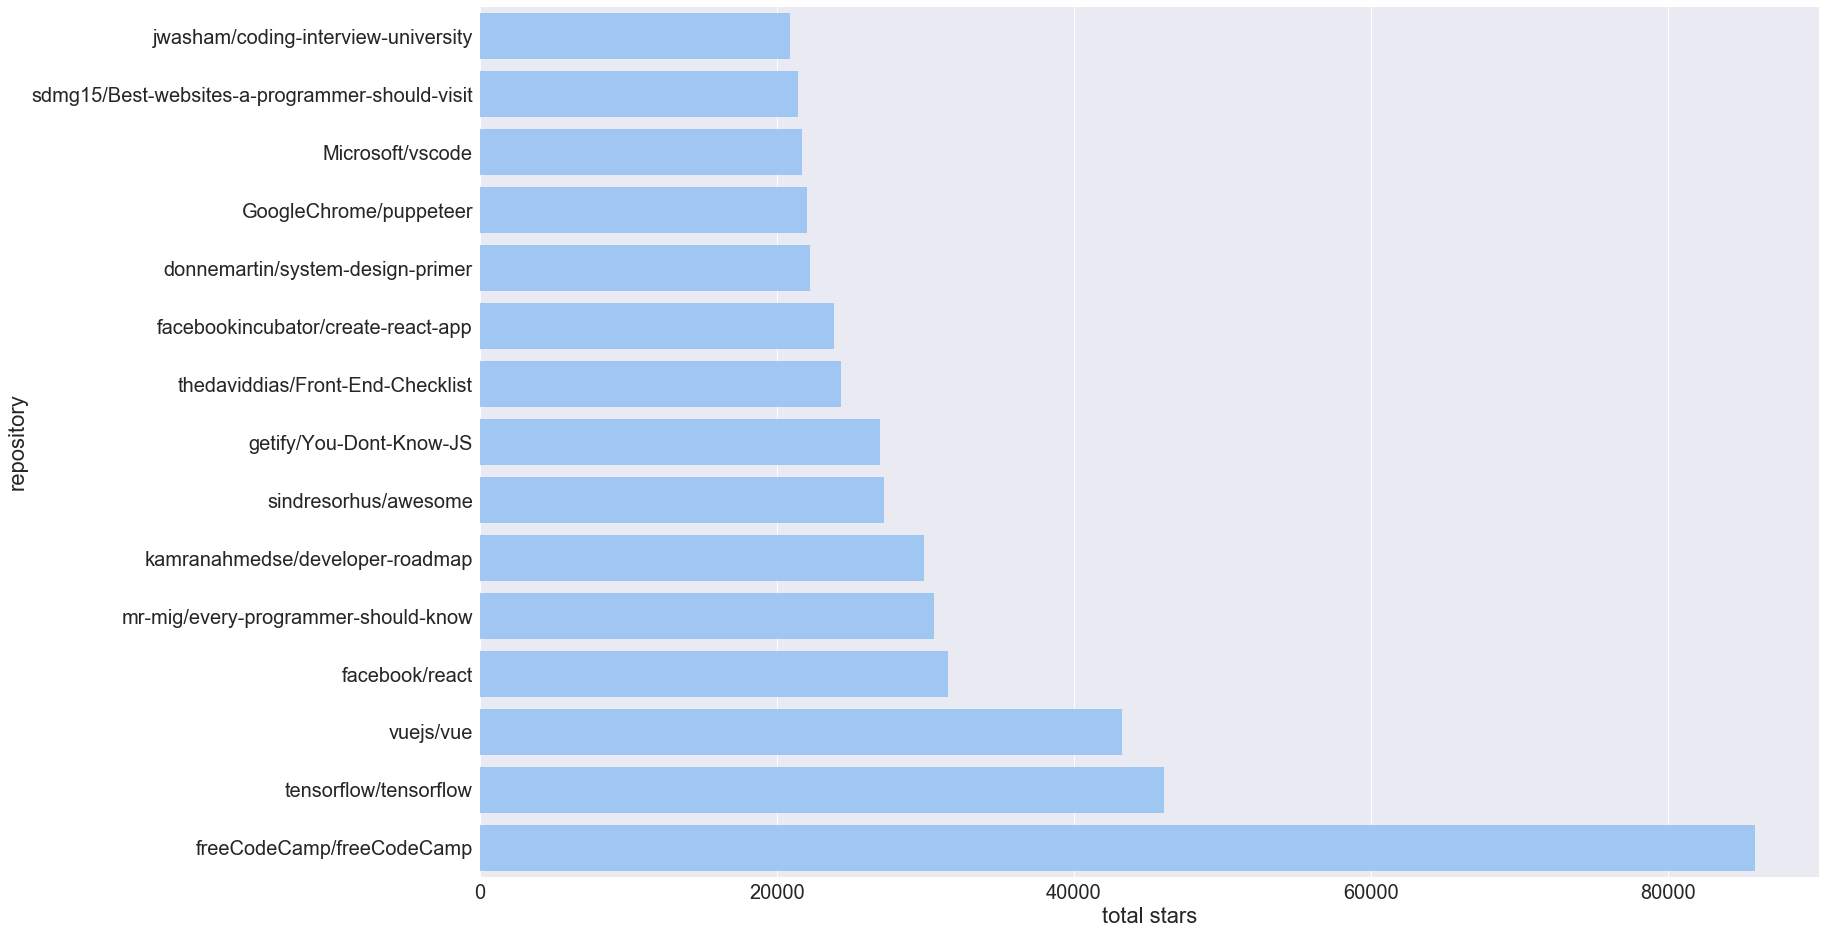

In [85]:
import seaborn as sns
import pylab as plt

# Configure style
sns.set(style="whitegrid")
sns.set(font_scale=2)

# Initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(24,16))

# Trim the chart to N rows
chart_counts = star_counts[-15:]

# Plot the total crashes
sns.set_color_codes("pastel")
ax = sns.barplot(
  x="count", 
  y="repo", 
  data=chart_counts,        
  label="Stars", 
  color="b"
)

# Set the axis labels
ax.set(xlabel="total stars", ylabel="repository")